In [53]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [155]:
# Lorenz 1963

# Number of variables.
M = 3
# Number of iterations.
N = int(1e4)
# Time step.
h = 0.01
# Constants.
s, r, b = 10., 28, 8/3.

# Generate time array.
t = np.arange(0., N * h, h)
# Wwights for each Runge Kutta steps.
w = np.array( [1, 1, 1, 2] )
# Initial conditions.
x_0 = np.array( [0.01] * M )
# Runge Kutta steps array.
X = np.array( [ [0.] * (w.shape[0] + 1) ] * M )
# Results array.
x = np.array( [ ( [i] + [0.0] * (N - 1) ) for i in x_0 ] )

# Iterate for every time step.
for i in range(N - 1):
    # Iterate for each Runge Kutta step.
    for j in range(w.shape[0]):
        # Generate the input variable for the Runge Kutta step.
        x_t = np.array( [x[k, i] + h * X[k, j] * w[j] / 2 for k in range(M)] )
        # Calculate the Runge Kutta step.
        X[0, j + 1] = s * ( x_t[1] - x_t[0] )
        X[1, j + 1] = x_t[0] * ( r - x_t[2] ) - x_t[1]
        X[2, j + 1] = x_t[1] * x_t[0] - b * x_t[2]

    # Generate the result.
    x[:, i + 1] = ( x[:, i] + h / 6 * ( X[:, 1]
        + 2 * X[:, 2] + 2 * X[:, 3] + X[:, 4] ) )

# Plot
#fig, axes = plt.subplots(M)
#fig.set_facecolor("w")
#fig.set_size_inches(10, 8)
#fig.set_dpi(150)

#for i in range(M):
#    axes[i].plot(t, x[i])
#    axes[i].set_xlim(0, h * N)

#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
#fig.set_facecolor("w")
#fig.set_size_inches(10, 8)
#fig.set_dpi(150)

#ax.plot(x[0], x[1], x[2])

In [217]:
x[:, 0] = ( np.roll(x[:, 0], -2) - np.roll(x[:, 0], 1) ) * np.roll(x[:, 0], -1) - x[:, 0] + F
x[:, 0]

/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_2140/12190943.py:1: RuntimeWarning: invalid value encountered in subtract
  x[:, 0] = ( np.roll(x[:, 0], -2) - np.roll(x[:, 0], 1) ) * np.roll(x[:, 0], -1) - x[:, 0] + F


array([ nan,  nan,  nan,  nan,  inf,  nan,  nan,  inf,  nan,  inf,  nan,
       -inf])

[8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]


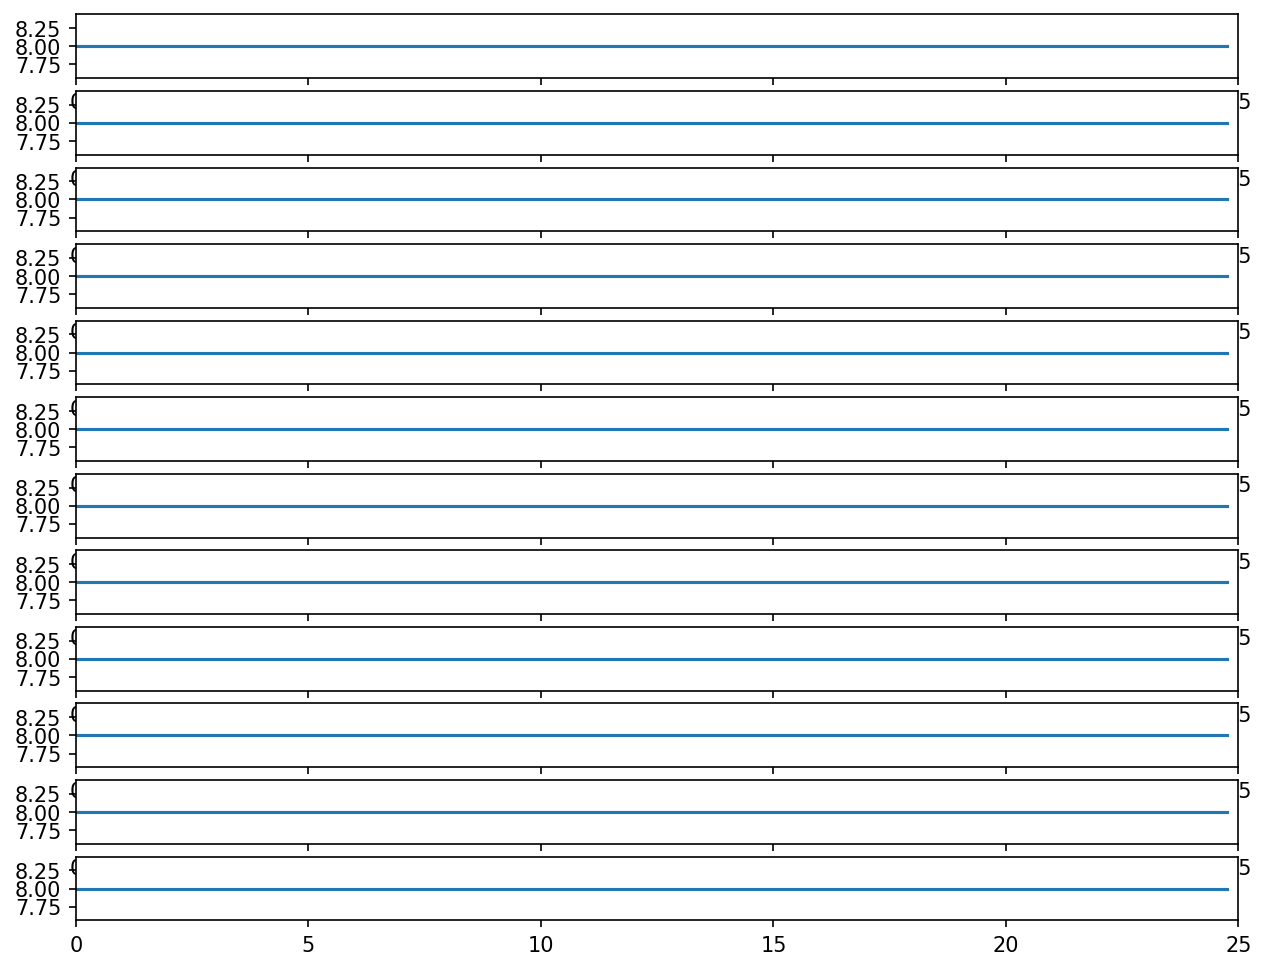

In [218]:
# Lorenz 1996

# Number of variables.
M = 12
# Number of iterations.
N = int(1e2)
# Time step.
h = 0.25
# Constants.
F = 8.

# Generate time array.
t = np.arange(0., N * h, h)
# Wwights for each Runge Kutta steps.
w = np.array( [1, 1, 1, 2] )
# Initial conditions.
x_0 = np.array( [F] * M )
#x_0[0] = x_0[0] + 0.01
print(x_0)
# Runge Kutta steps array.
X = np.array( [ [0.] * (w.shape[0] + 1) ] * M )
# Results array.
x = np.array( [ ( [i] + [0.0] * (N - 1) ) for i in x_0 ] )

# Iterate for every time step.
for i in range(N - 1):
    # Iterate for each Runge Kutta step.
    for j in range(w.shape[0]):
        # Generate the input variable for the Runge Kutta step.
        x_t = np.array ([ x[k, i] + h * X[k, j] * w[j] / 2 for k in range(M)])
        # Calculate the Runge Kutta step.
        X[:, j + 1] = ( ( np.roll(x_t, -1) - np.roll(x_t, 2) )
            * np.roll(x_t, 1) - x_t + F )
    #print(x_t)

    #print(X[:, 4])
    # Generate the result.
    x[:, i + 1] = ( x[:, i] + h / 6 * ( X[:, 1]
        + 2 * X[:, 2] + 2 * X[:, 3] + X[:, 4] ) )

# Plot
fig, axes = plt.subplots(M)
fig.set_facecolor("w")
fig.set_size_inches(10, 8)
fig.set_dpi(150)

for i in range(len(axes)):
    axes[i].plot(t, x[i])
    axes[i].set_xlim(0, h * N)